# Business Case

Skin disease is a major problem among people worldwide. Different machine learning techniques can be applied to identify
classes of skin disease. Herein, we have applied machine learning algorithms to categorize classes of skin disease using
ensemble techniques, and then a feature selection method is utilized to compare the results obtained.

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.Whereas the diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. with the name of class column

## Attribute Information:

In this skin disease disorder dataset it contains 2 parts which is shows clinical attributes and Histopathological
Attributes where outcome of this dataset defined by class column

## Clinical Attributes:

1) erythema
2) scaling
3) definite borders
4) itching
5) koebner phenomenon
6) polygonal papules
7) follicular papules
8) oral mucosal involvement
9) knee and elbow involvement
10) scalp involvement
11) family history, (0 or 1)

## Histopathological Attributes:

12) melanin incontinence
13) eosinophils in the infiltrate
14) PNL infiltrate
15) fibrosis of the papillary dermis
16) exocytosis
17) acanthosis
18) hyperkeratosis
19) parakeratosis
20) clubbing of the rete ridges
21) elongation of the rete ridges
22) thinning of the suprapapillary epidermis
23) spongiform pustule
24) munro microabcess
25) focal hypergranulosis
26) disappearance of the granular layer
27) vacuolisation and damage of basal layer
28) spongiosis
29) saw-tooth appearance of retes
30) follicular horn plug
31) perifollicular parakeratosis
32) inflammatory monoluclear inflitrate
33) band-like infiltrate
34) Age (linear)

## STEPS

1) Loading the file into the notebook
2) Merging the file to create a single file
3) Removing Info
4) Checking Describe
5) EDA
6) Creating variable that contain clinical data
7) Creating variable that contain histopathological data
8) Check Univariance and Bivarience
9) Import sweetviz for analysing the Data only for Univariance
10) Create data preprocressing pipeline
11) Check null values
12) Used labelencoder for Converting object datatype into int datatype
13) Use Boxplot for outliers
14) Feature Selection
15) Model Creation
16) Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset_35_dermatology (1).csv')  # upload dataset.
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
data.shape

(366, 35)

In [5]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [7]:
data.describe(include='O')

,Age
count,366
unique,61
top,40
freq,17


In [8]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [9]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [ ]:
# erythema,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,
# scalp_involvement,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,
# saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,band-like_infiltrate 
# in this column there are mean is greater than median so there is possobility that there should be outliers

# EDA

In [10]:
# Clinical Data
data1 = data[['erythema','scaling','definite_borders','itching','koebner_phenomenon','polygonal_papules','follicular_papules',
              'oral_mucosal_involvement','knee_and_elbow_involvement','scalp_involvement','family_history','hyperkeratosis','Age']]
data1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,hyperkeratosis,Age
0,2,2,0,3,0,0,0,0,1,0,0,0,55
1,3,3,3,2,1,0,0,0,1,1,1,0,8
2,2,1,2,3,1,3,0,3,0,0,0,0,26
3,2,2,2,0,0,0,0,0,3,2,0,0,40
4,2,3,2,2,2,2,0,2,0,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,25
362,3,2,1,0,1,0,0,0,0,0,0,0,36
363,3,2,2,2,3,2,0,2,0,0,0,0,28
364,2,1,3,1,2,3,0,2,0,0,0,0,50


In [11]:
#Histopathalogical data
data2 = data[['melanin_incontinence',
       'eosinophils_in_the_infiltrate',
       'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis',
       'exocytosis',
       'acanthosis',
       'parakeratosis',
       'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis',
       'spongiform_pustule',
       'munro_microabcess', 
       'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 
       'spongiosis',
       'saw-tooth_appearance_of_retes',
       'follicular_horn_plug',
       'perifollicular_parakeratosis', 
       'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']]

data2

,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,...,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate
0,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
1,0,0,1,0,1,2,2,2,2,2,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,2,2,0,0,0,...,0,2,0,2,3,2,0,0,2,3
3,0,0,3,0,0,2,3,2,2,2,...,0,0,3,0,0,0,0,0,3,0
4,1,0,0,0,1,2,0,0,0,0,...,0,2,2,3,2,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,2,0
362,0,0,0,0,2,2,0,0,0,0,...,0,0,1,0,1,0,0,0,2,0
363,2,2,0,0,3,3,0,0,0,0,...,0,3,0,3,0,3,0,0,2,3
364,2,0,0,0,3,2,0,0,0,0,...,0,3,0,2,0,1,0,0,2,3


In [12]:
# Univariant Analysis 
!pip install sweetviz#installing sweetviz library`

ERROR: Invalid requirement: 'sweetviz#installing'


In [13]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
# Bivaraite Analysis
# Checking relationship of all variables with respect to target variable

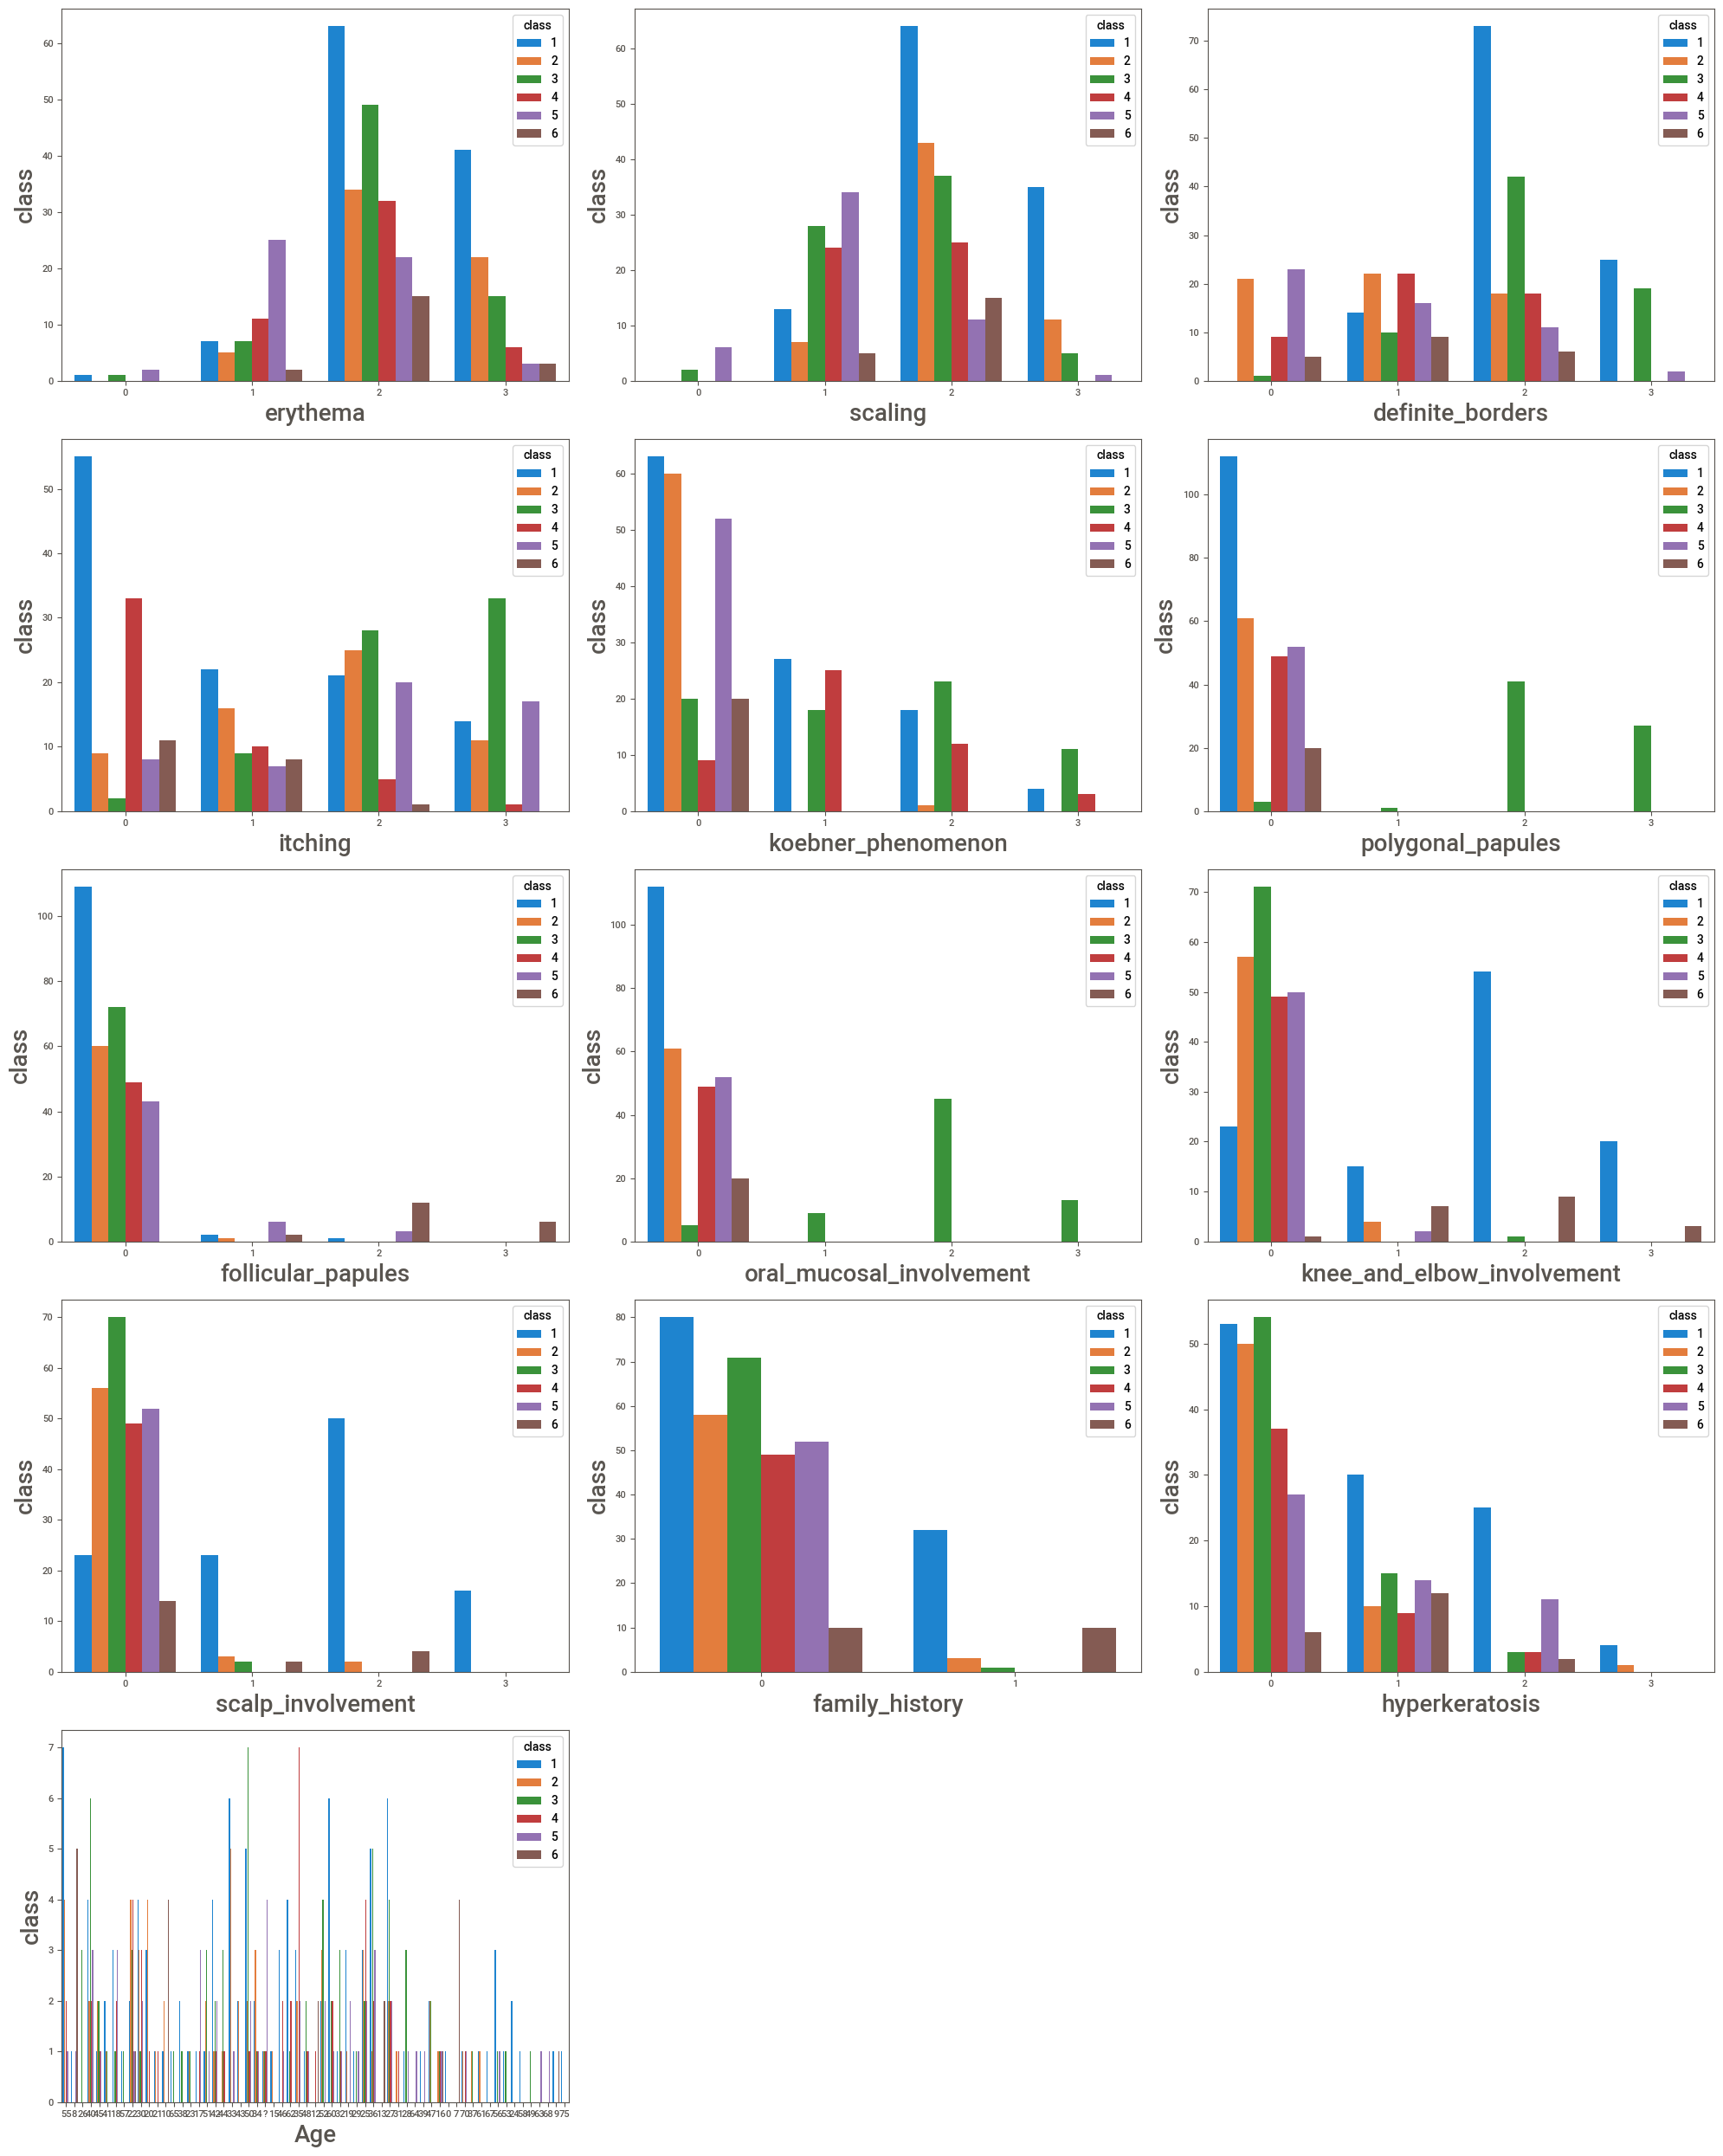

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1: 
    if plotnumber<=14 :
        ax = plt.subplot(5,3,plotnumber)
        sns.countplot(x=data1[column],hue=data['class'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()

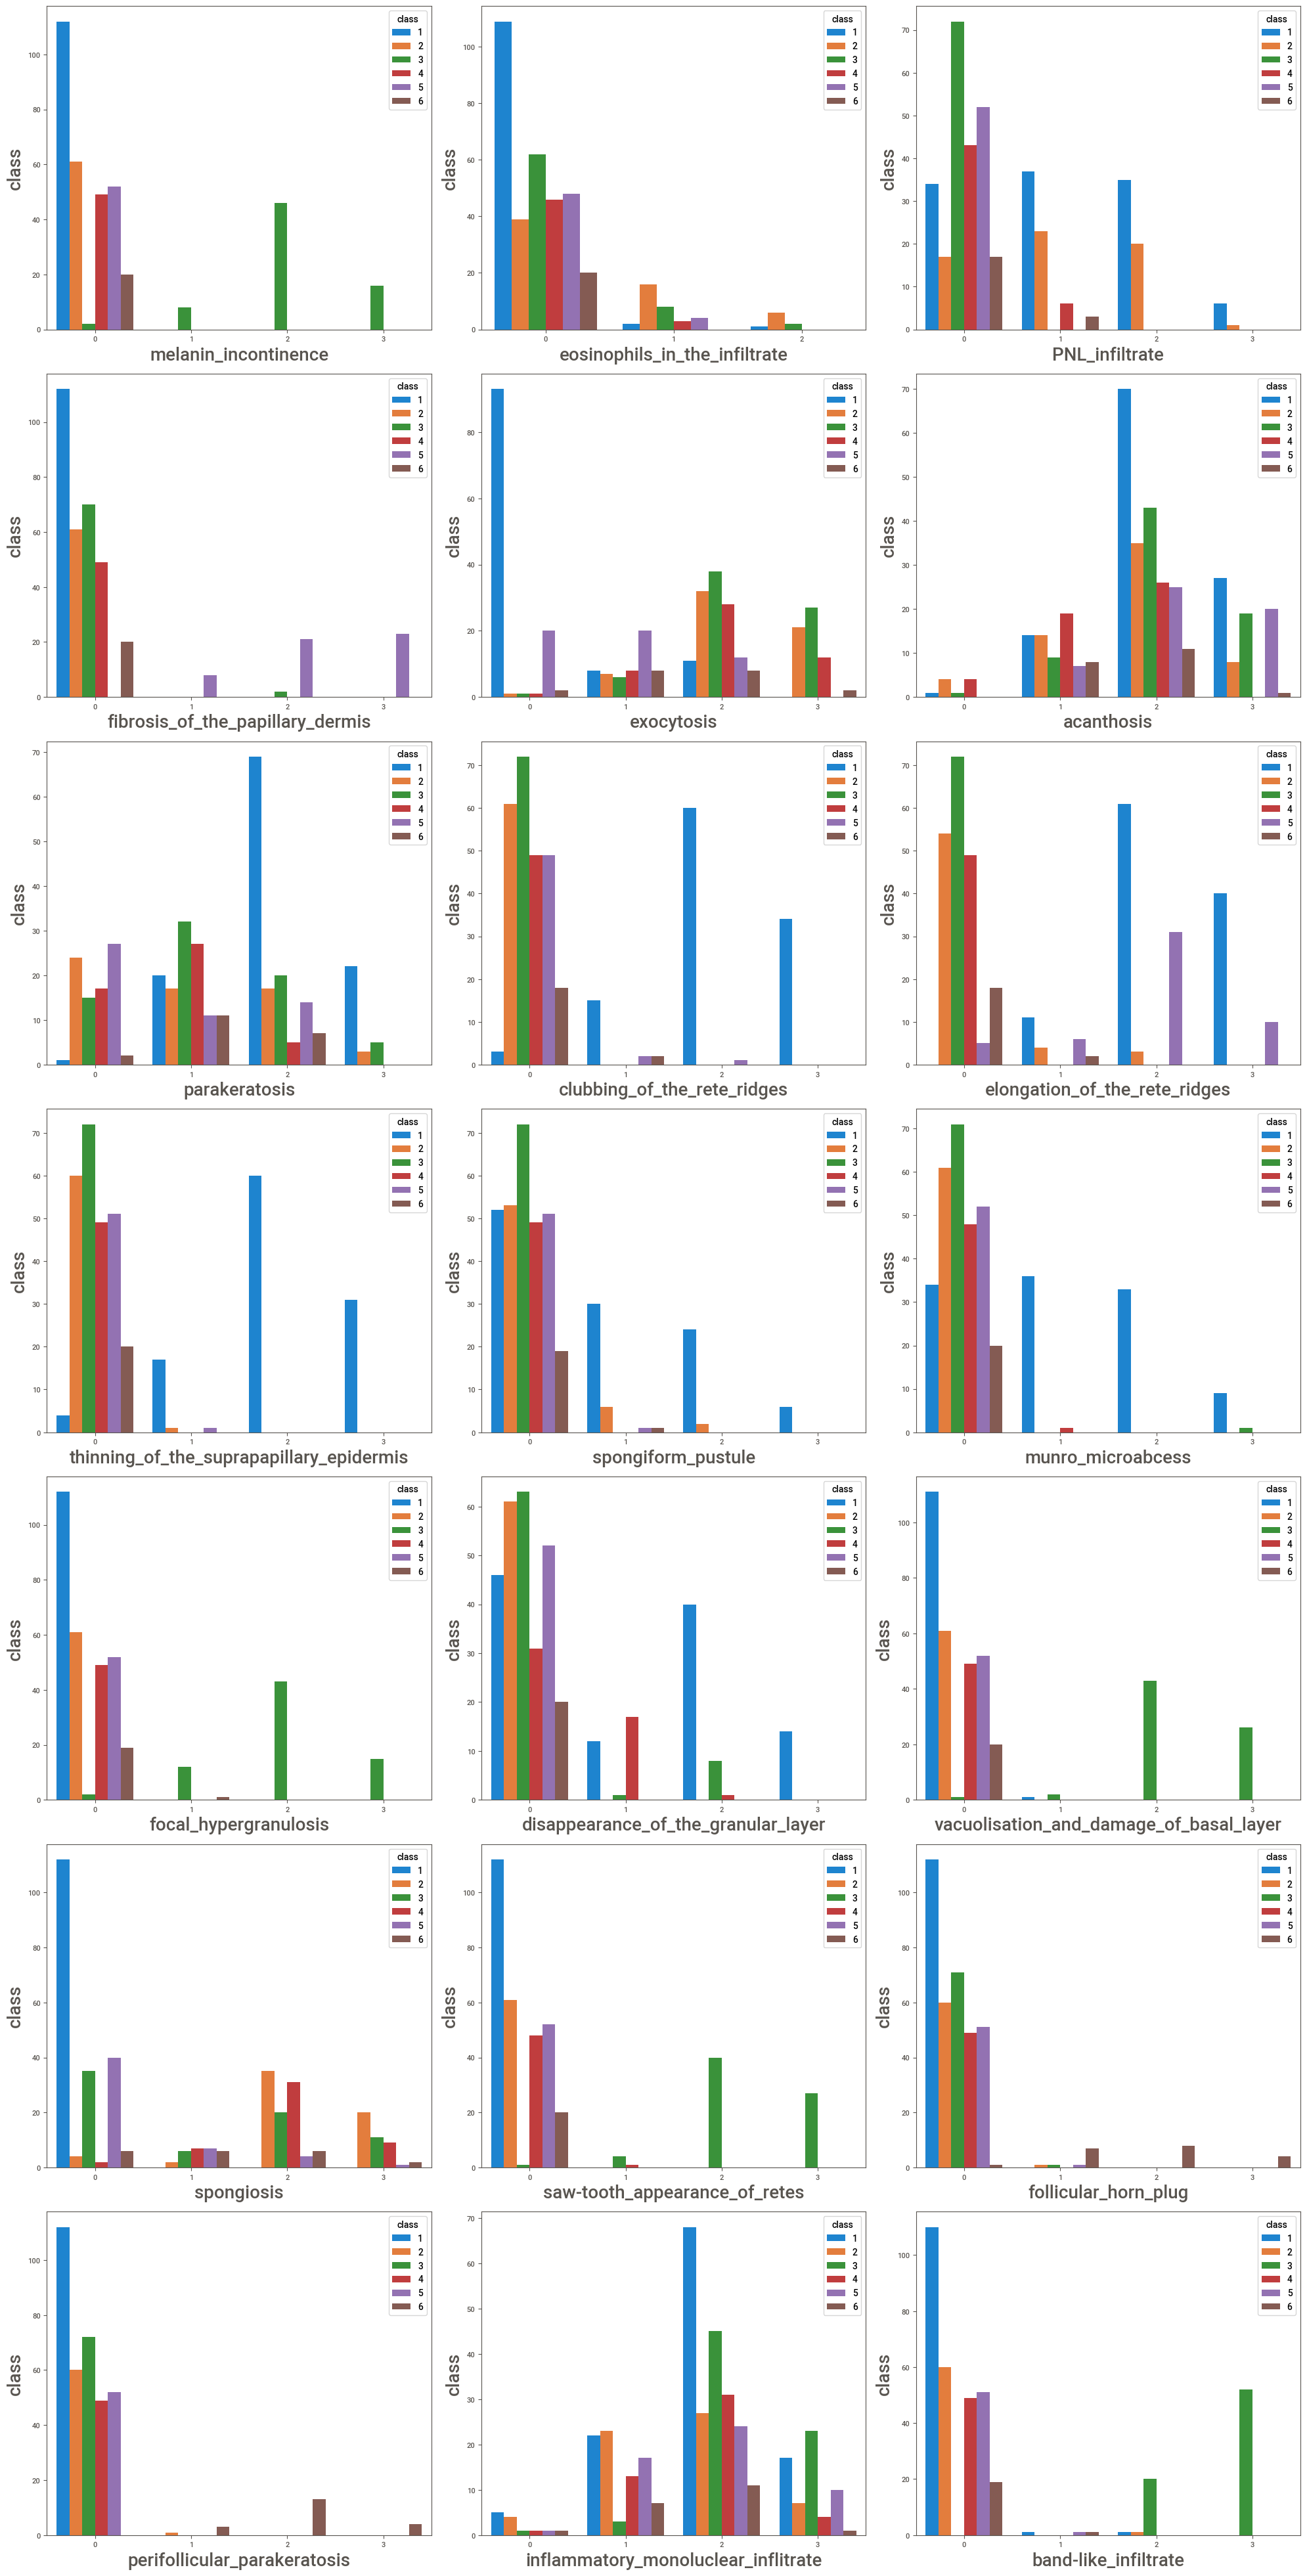

In [20]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=22:
        ax=plt.subplot(9,3,plotnumber)
        ax=sns.countplot(x=data[column],hue ='class',data = data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Data Preprocessing Pipeline

In [14]:
# Checking null values
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [15]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [16]:
data['Age']=le.fit_transform(data['Age'])

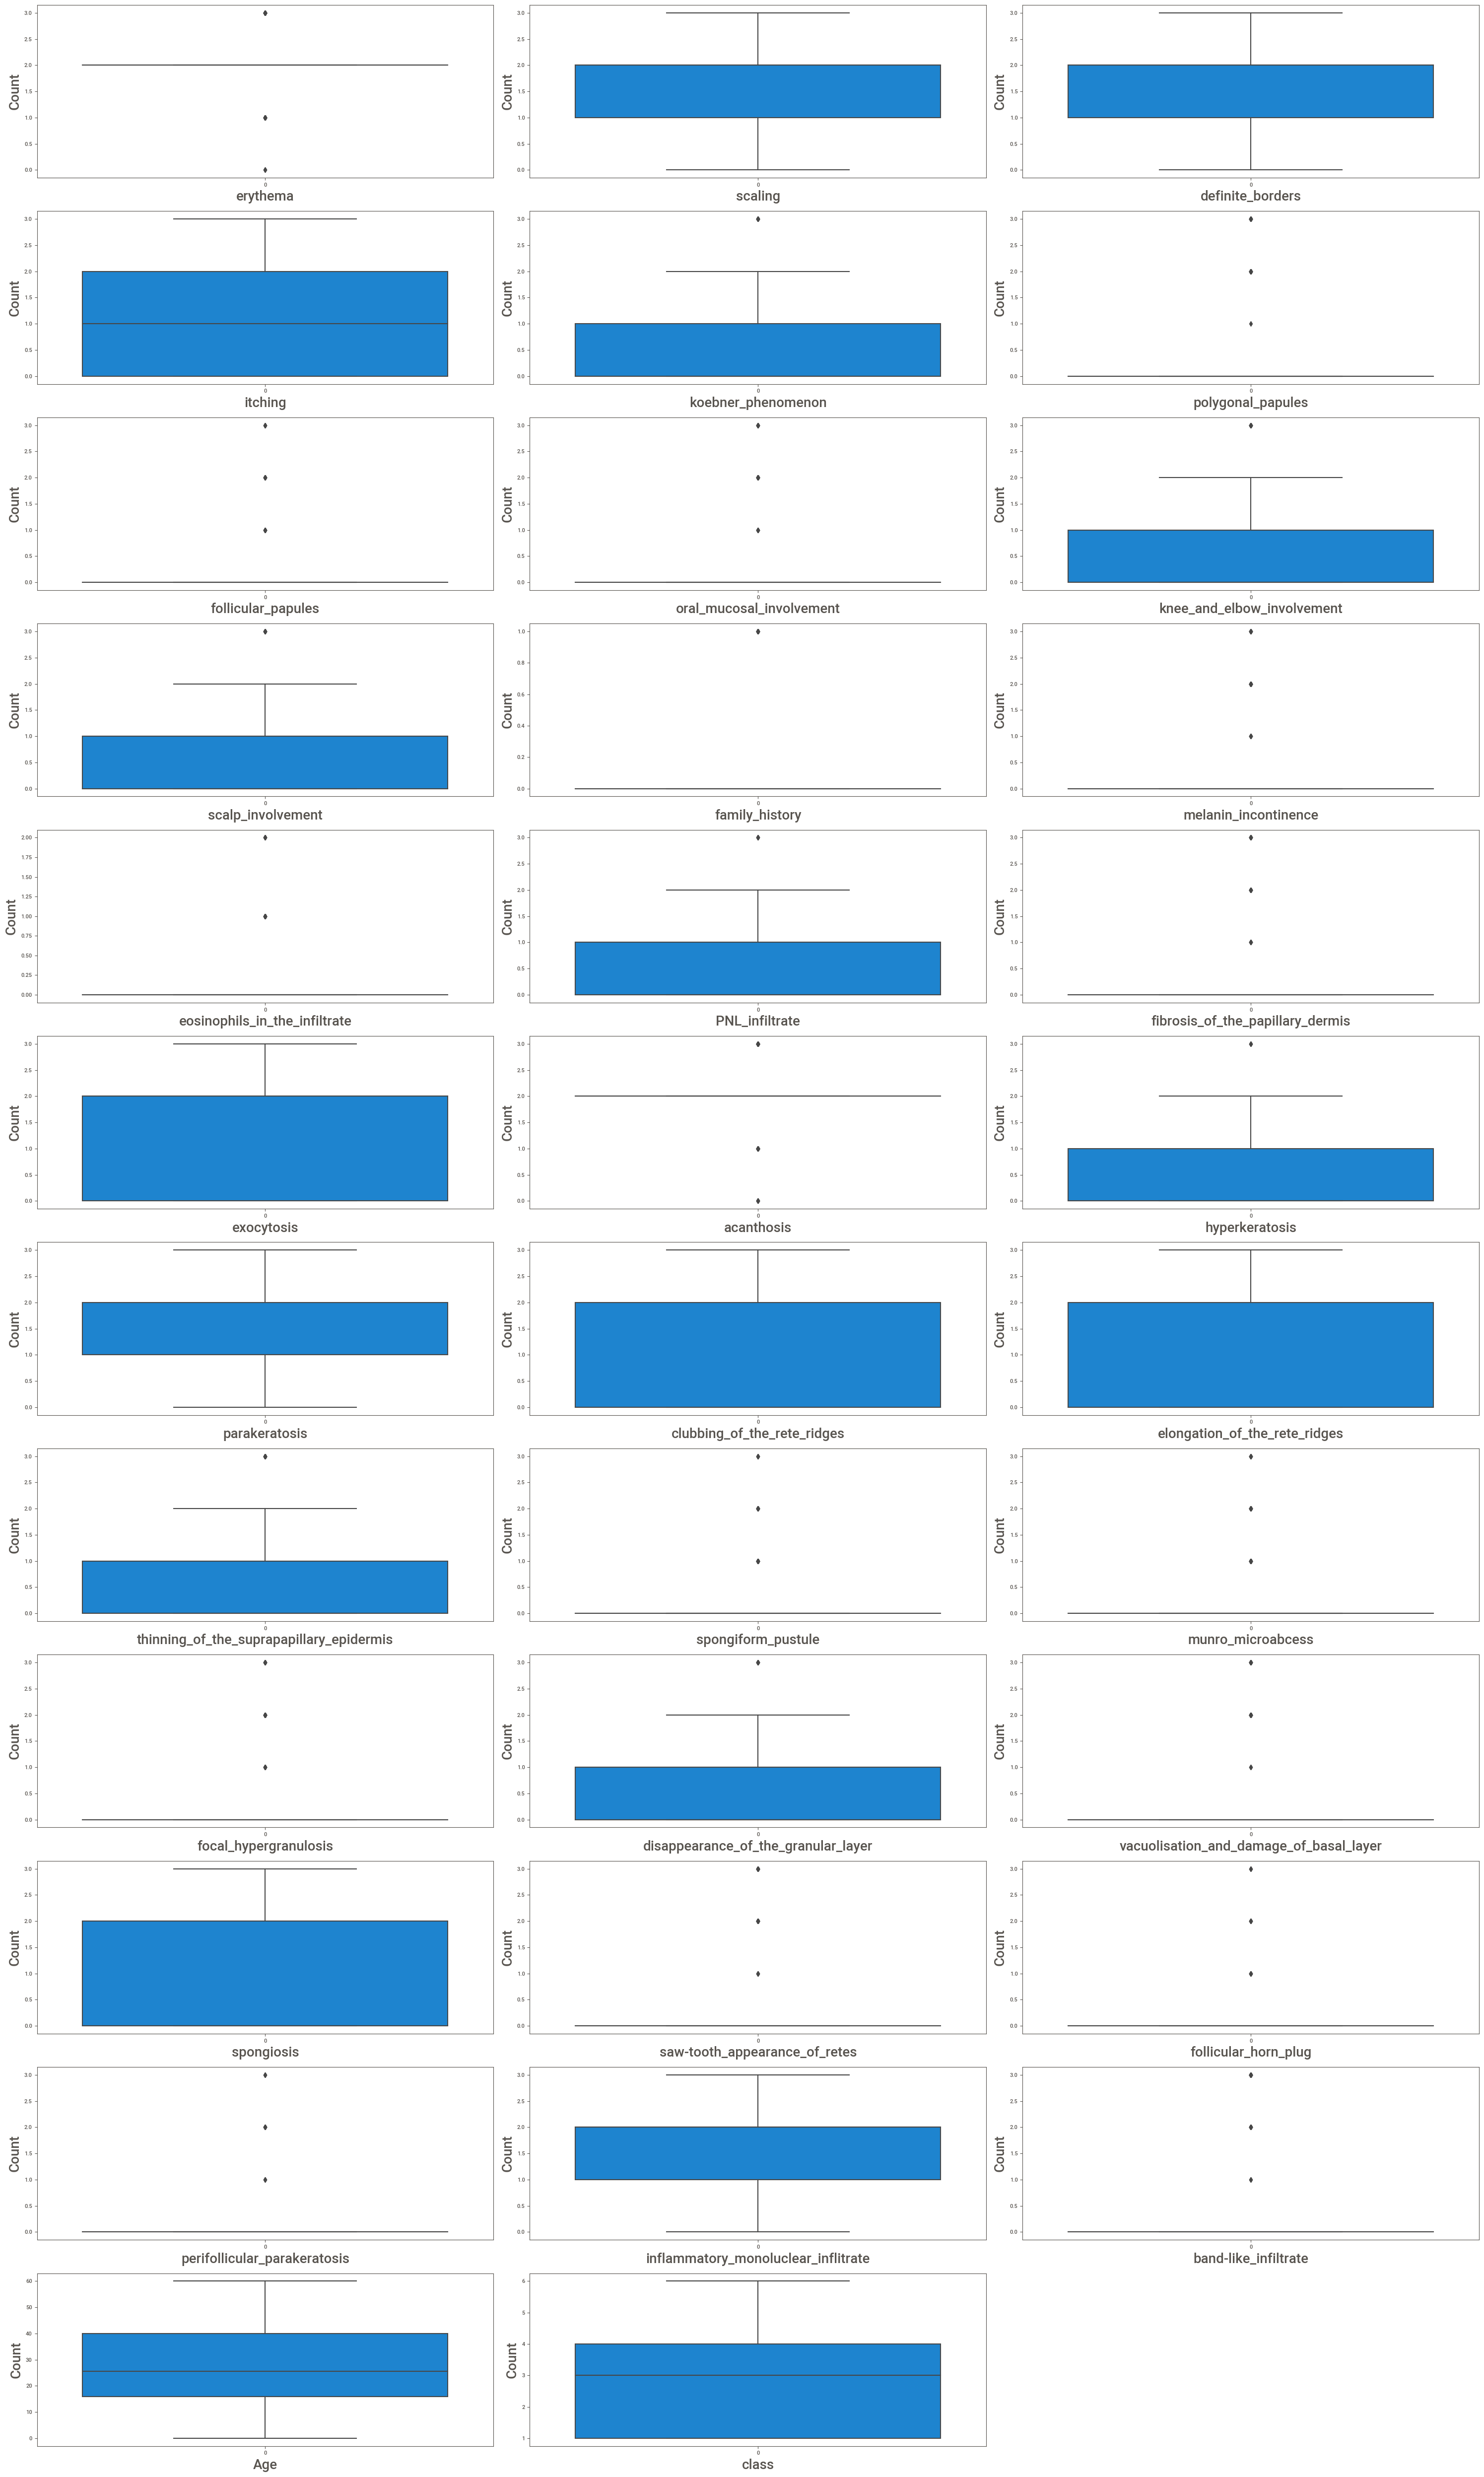

In [17]:
# Step 4 -> Checking the outliers
plt.figure(figsize= (30,50),facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber<=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Count' , fontsize = 20)
    plotnumber+=1
plt.tight_layout()

# Feature Selection

In [18]:
#  We will check correlation
data.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.035623,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,-0.015257,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.053459,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.013096,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.009164,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.026008,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.015331,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.039748,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,0.022924,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.058317,-0.533208


<Axes: >

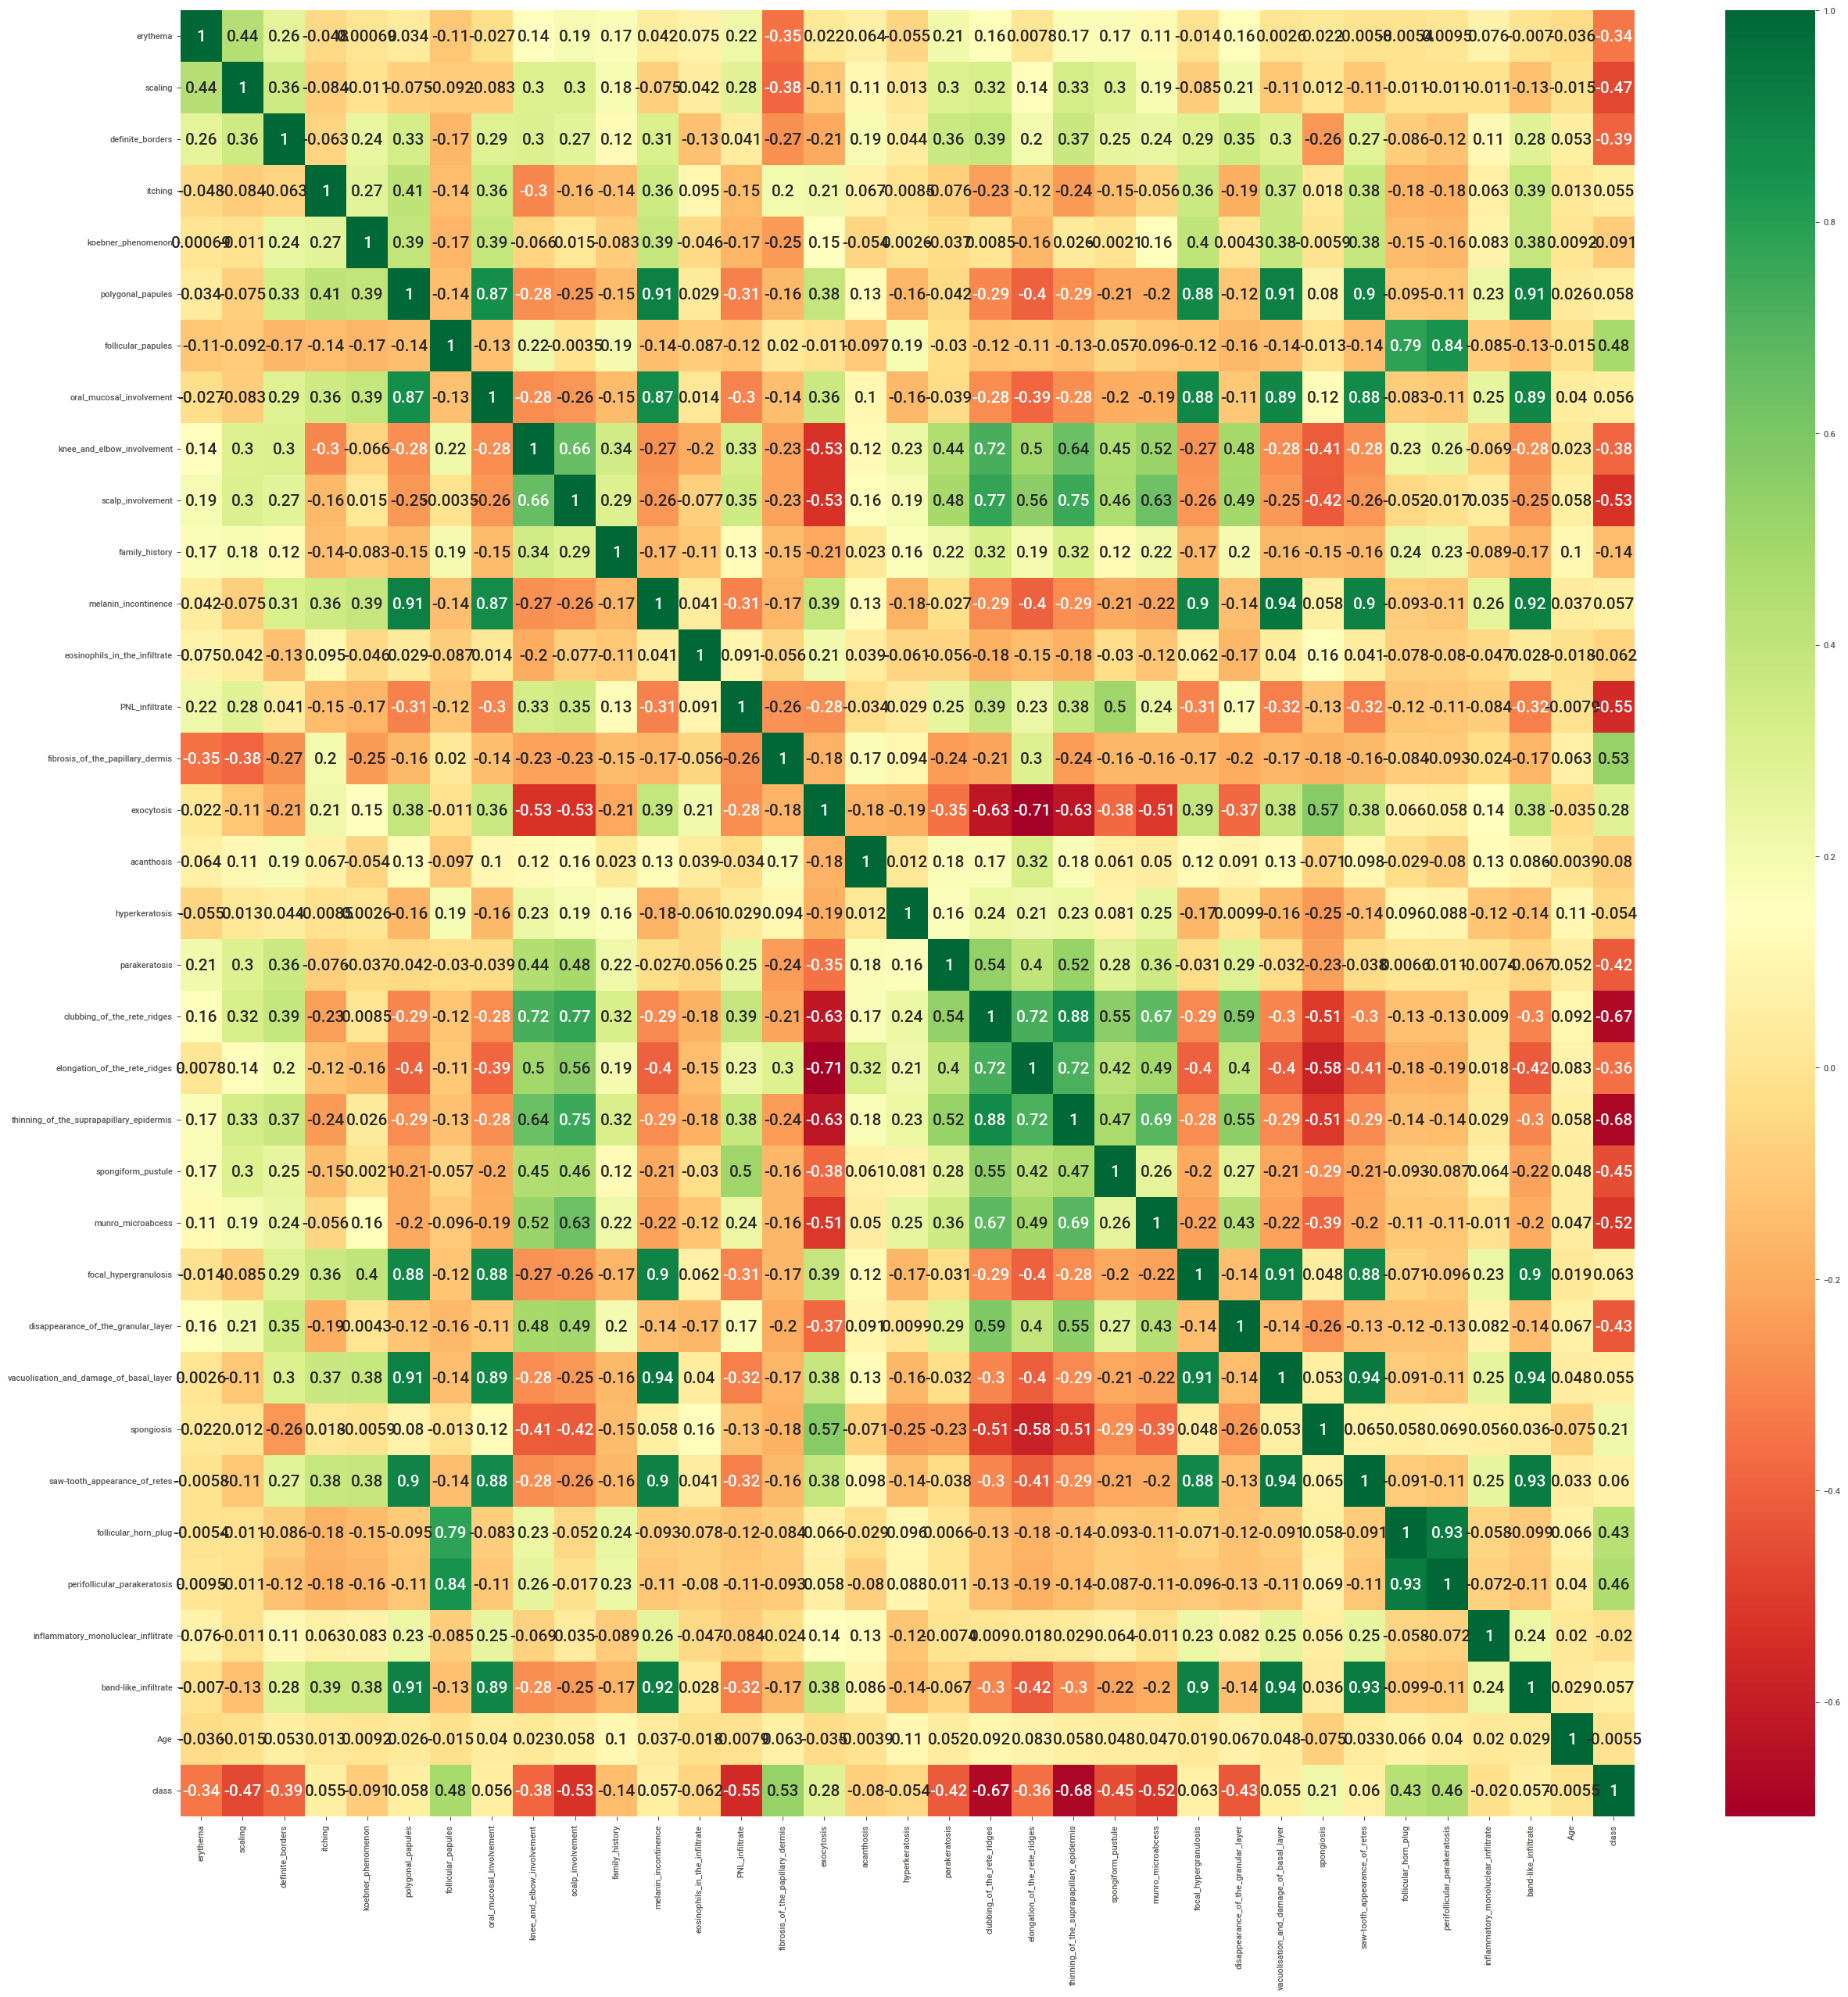

In [19]:
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [21]:
data.drop(['polygonal_papules','oral_mucosal_involvement','melanin_incontinence','focal_hypergranulosis',
        'follicular_horn_plug','vacuolisation_and_damage_of_basal_layer','saw-tooth_appearance_of_retes'],axis=1)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,follicular_papules,knee_and_elbow_involvement,scalp_involvement,family_history,eosinophils_in_the_infiltrate,...,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,disappearance_of_the_granular_layer,spongiosis,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,1,0,0,0,...,0,0,0,0,3,0,1,0,43,2
1,3,3,3,2,1,0,1,1,1,0,...,2,2,1,0,0,0,1,0,58,1
2,2,1,2,3,1,0,0,0,0,0,...,0,0,0,0,3,0,2,3,15,3
3,2,2,2,0,0,0,3,2,0,0,...,2,2,0,3,0,0,3,0,29,1
4,2,3,2,2,2,0,0,0,0,0,...,0,0,0,2,2,0,2,3,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,2,0,14,4
362,3,2,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,2,0,25,4
363,3,2,2,2,3,0,0,0,0,2,...,0,0,0,0,0,0,2,3,17,3
364,2,1,3,1,2,0,0,0,0,0,...,0,0,0,0,0,0,2,3,39,3



# Model Creation

In [22]:
x = data.drop('class', axis=1)
x

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,43
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,58
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,15
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,29
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,14
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,25
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,17
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,39


In [23]:
#dependent variable 
y=data['class']
y 

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [26]:
## step 2 Training and testing data creation 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((274, 34), (92, 34), (274,), (92,))

In [27]:
from imblearn.over_sampling import SMOTE #for balancing the data
sm = SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
# Predict
y_pred = LR.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# Checking Accuracy score
lg_re = accuracy_score(y_test,y_pred)
print(lg_re)

[[32  0  0  0  0  0]
 [ 0 17  0  1  0  0]
 [ 0  0 14  0  0  0]
 [ 0  3  0  9  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       0.85      0.94      0.89        18
           3       1.00      1.00      1.00        14
           4       0.90      0.75      0.82        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.96        92
   macro avg       0.96      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92

0.9565217391304348


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_smote,y_smote)
y_pred = KNN.predict(x_test)

In [31]:
# let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)
y_pred = knn1.predict(x_test)
knn = accuracy_score(y_test,y_pred)
print("The accuracy score is : ", knn)
print(classification_report(y_test,y_pred))

The accuracy score is :  0.8369565217391305
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        32
           2       0.67      0.67      0.67        18
           3       1.00      1.00      1.00        14
           4       0.53      0.67      0.59        12
           5       0.92      0.85      0.88        13
           6       0.75      1.00      0.86         3

    accuracy                           0.84        92
   macro avg       0.81      0.85      0.82        92
weighted avg       0.85      0.84      0.84        92



## Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = LR, n_estimators = 50)
model.fit(x_smote,y_smote)
y_pred = model.predict(x_test)
bag_ing = accuracy_score(y_test,y_pred)
print("The accuracy score is : ", bag_ing)
print(classification_report(y_test,y_pred))

The accuracy score is :  0.9456521739130435
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       0.84      0.89      0.86        18
           3       1.00      1.00      1.00        14
           4       0.82      0.75      0.78        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.95        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.95      0.95      0.95        92



## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
dt = accuracy_score(y_test,y_pred)
print("The accuracy score is : ", dt)
print(classification_report(y_test,y_pred))

The accuracy score is :  0.9347826086956522
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       1.00      0.67      0.80        18
           3       1.00      1.00      1.00        14
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        13
           6       0.43      1.00      0.60         3

    accuracy                           0.93        92
   macro avg       0.89      0.94      0.89        92
weighted avg       0.96      0.93      0.94        92



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
rf = accuracy_score(y_test,y_pred)
print("The accuracy score is : ", rf)
print(classification_report(y_test,y_pred))

The accuracy score is :  0.9347826086956522
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       0.83      0.83      0.83        18
           3       1.00      1.00      1.00        14
           4       0.82      0.75      0.78        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.93        92
   macro avg       0.94      0.93      0.93        92
weighted avg       0.93      0.93      0.93        92



## Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)
gr_cl = accuracy_score(y_test,y_pred)
print("The accuracy score is : ", gr_cl)
print(classification_report(y_test,y_pred))

The accuracy score is :  0.9130434782608695
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        32
           2       0.82      0.78      0.80        18
           3       0.93      1.00      0.97        14
           4       0.80      0.67      0.73        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.91      0.91      0.91        92



## SVM

In [36]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
sv_m = accuracy_score(y_test,y_pred)
print("The accuracy score is : ", sv_m)
print(classification_report(y_test,y_pred))

The accuracy score is :  0.7391304347826086
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       0.44      0.89      0.59        18
           3       1.00      1.00      1.00        14
           4       0.00      0.00      0.00        12
           5       0.60      0.23      0.33        13
           6       0.75      1.00      0.86         3

    accuracy                           0.74        92
   macro avg       0.63      0.69      0.63        92
weighted avg       0.69      0.74      0.69        92



# Model accuracy table

In [37]:
Accuracy_Score_1 = pd.DataFrame([lg_re,knn,dt,rf,gr_cl,sv_m],
             index=['Logistic Regression','KNN','Decission Tree',
                    'Random Forest','Gradient Boosting Classifier',
                    'Support Vector Machine'],columns=['Accuracy'])


In [38]:
Accuracy_Score_1

,Accuracy
Logistic Regression,0.956522
KNN,0.836957
Decission Tree,0.934783
Random Forest,0.934783
Gradient Boosting Classifier,0.913043
Support Vector Machine,0.739130


In [39]:
Accuracy_Score = [lg_re,knn,dt,rf,gr_cl,sv_m]
Models = ['Logistic Regression','KNN','Decission Tree',
                    'Random Forest','Gradient Boosting Classifier',
                    'Support Vector Machine']

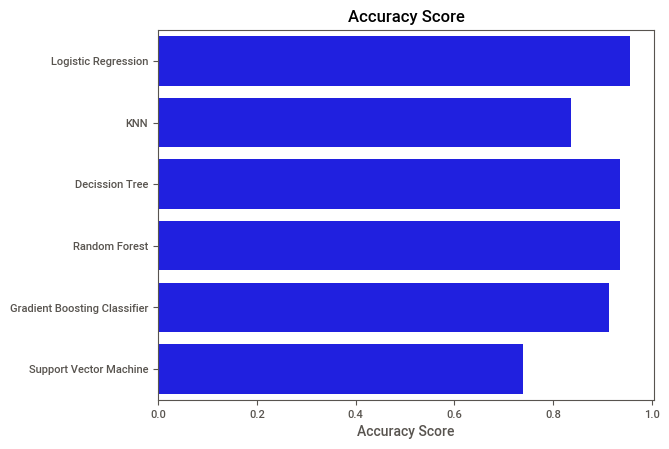

In [41]:
sns.barplot(x=Accuracy_Score, y=Models, color="blue")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

From the above scence it seems that logistic model gives 95% of accuracy

# Creating pickle file

In [42]:
import pickle

In [43]:
with open('data.pkl', 'wb') as file:
    pickle.dump(lg_re, file)

In [44]:
with open('data.pkl', 'rb') as f:
    pred=pickle.load(f)